In [190]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import os
df=pd.read_csv("../input/master.csv")

# Any results you write to the current directory are saved as output.

In [191]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [192]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [193]:
df['HDI for year'].fillna((df['HDI for year'].mean()), inplace=True) # replace NaN with average HDI

In [194]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


In [195]:
#Year is treated as a category variable.
df['year'] = df['year'].astype('object')

#gdp_for_year ($) is treated as a numerical value excluding commas.
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',','').astype('Int64')

In [196]:
df.dtypes

country                object
year                   object
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null object
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          27820 non-null float64
 gdp_for_year ($)     27820 non-null int64
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


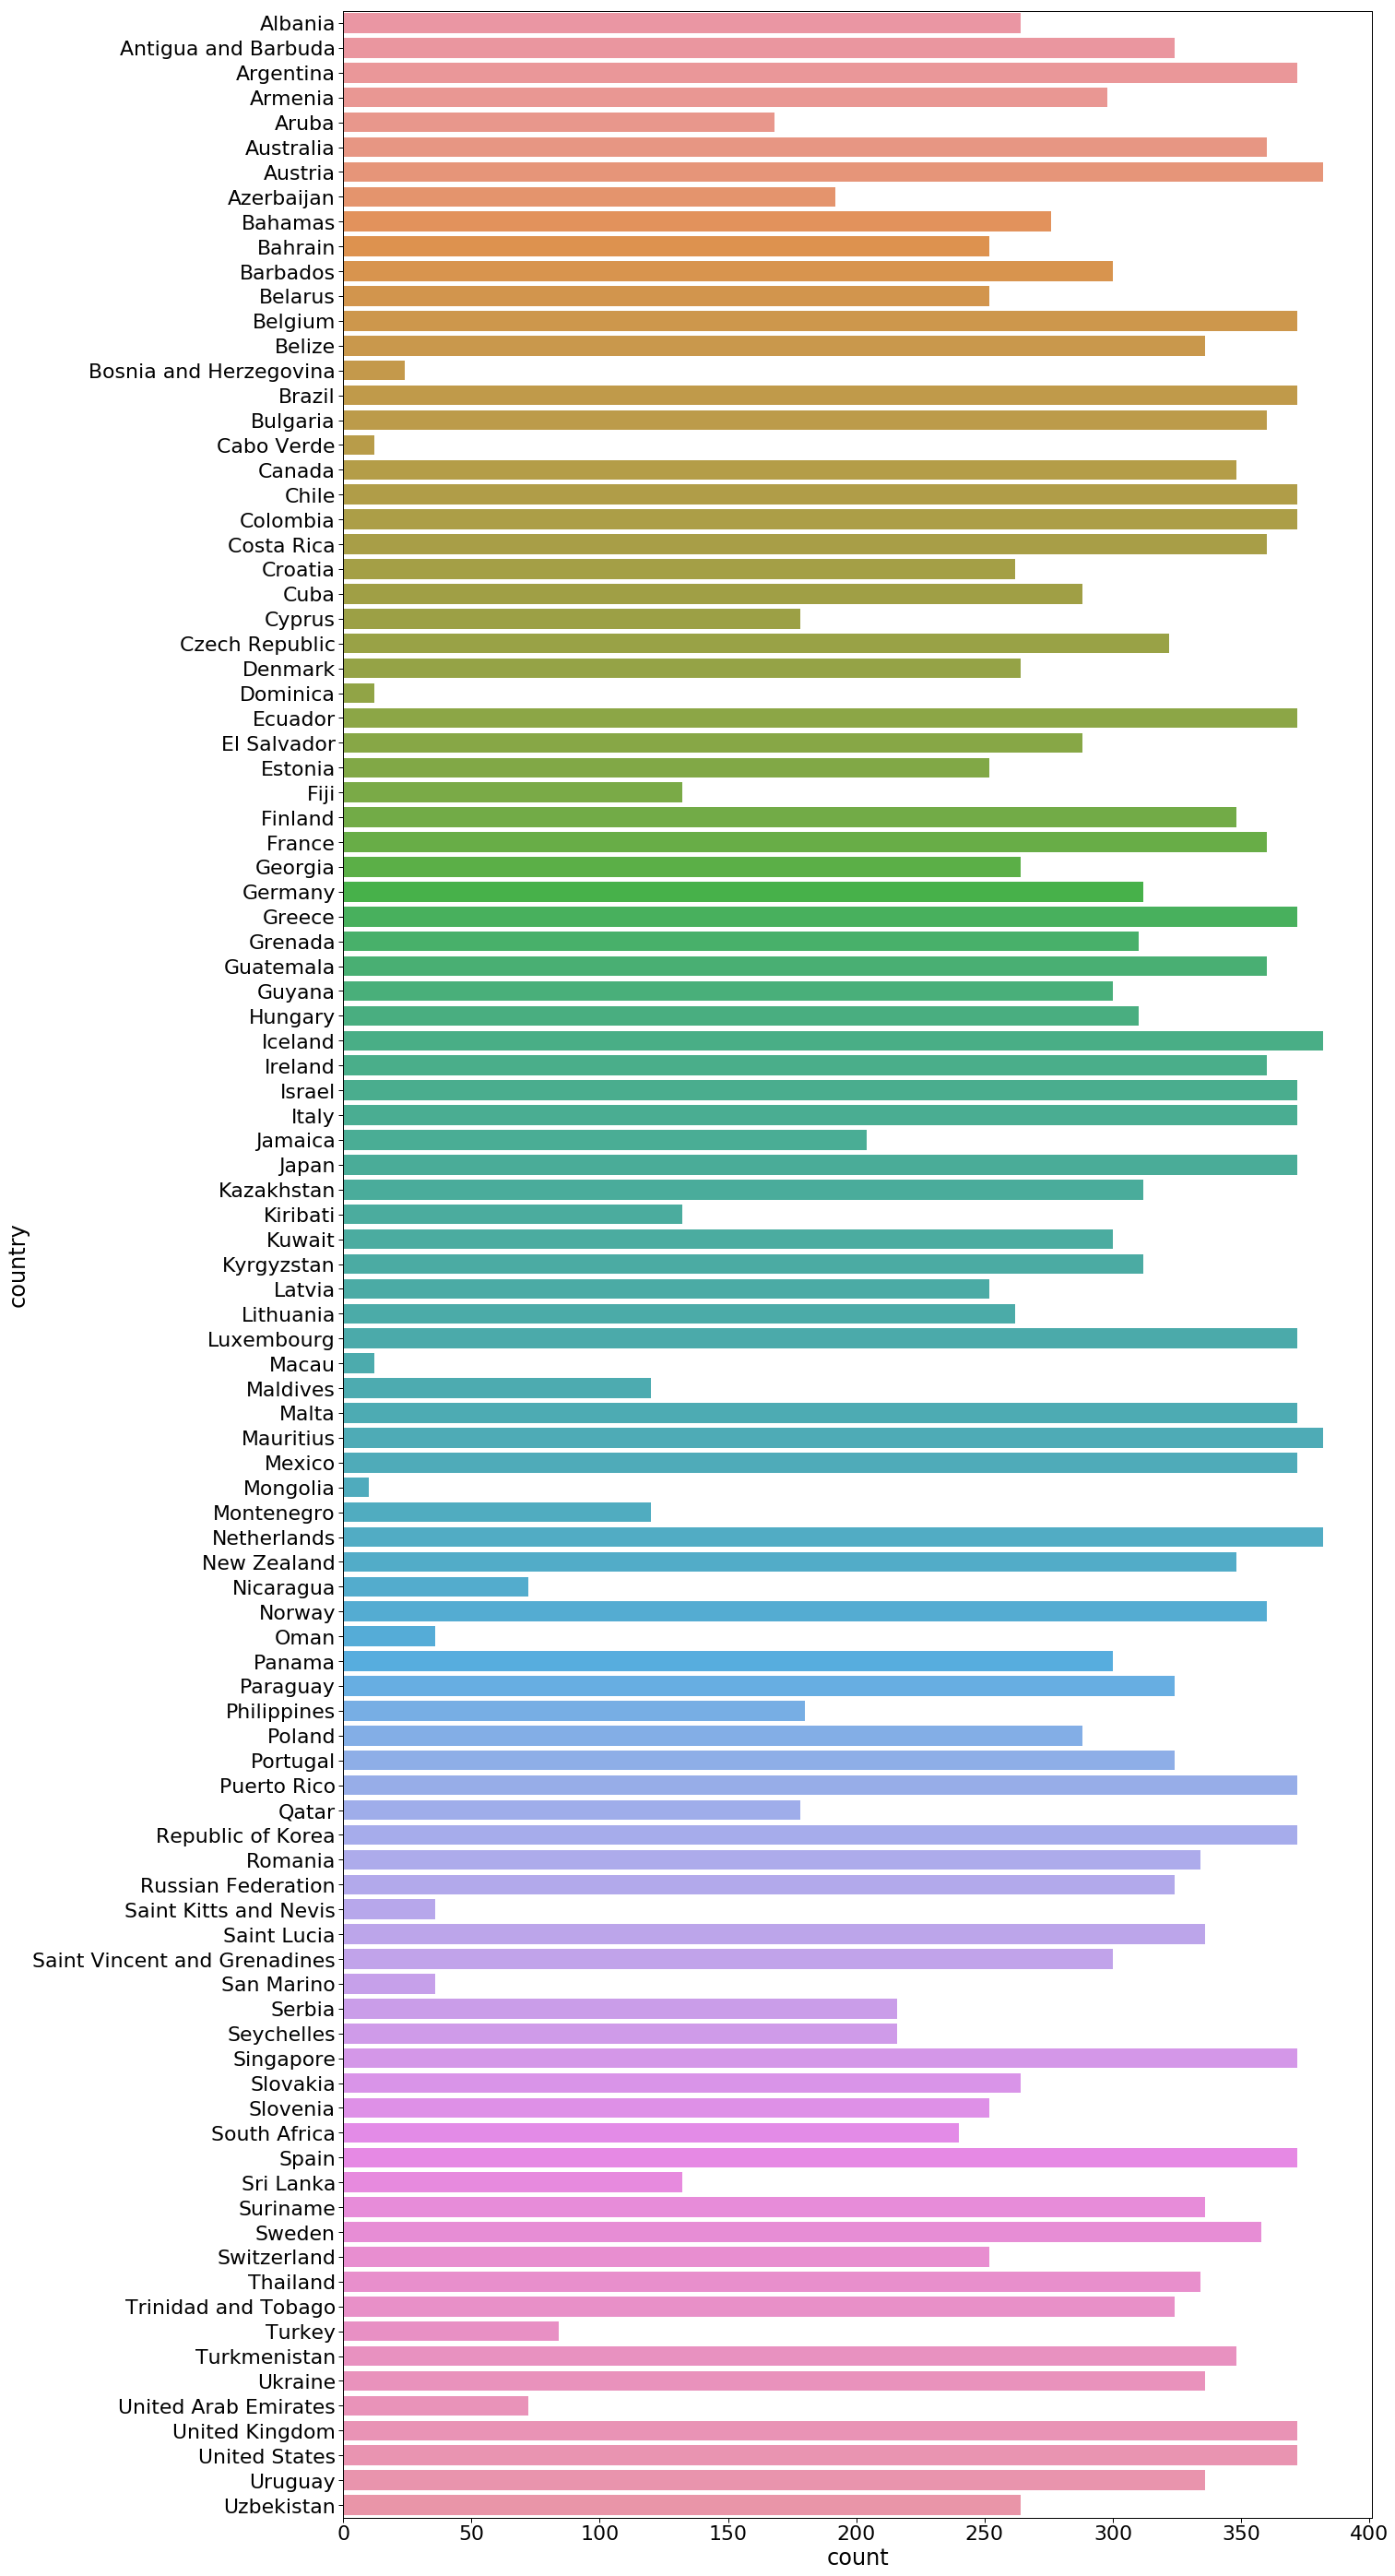

In [198]:

#Visualisation
#Lets look at the number of data in each country.


plt.figure(figsize=(20,50))
y = df['country']
sns.set_context("paper", 2.5, {"lines.linewidth": 4})
sns.countplot(y=y,label='count')

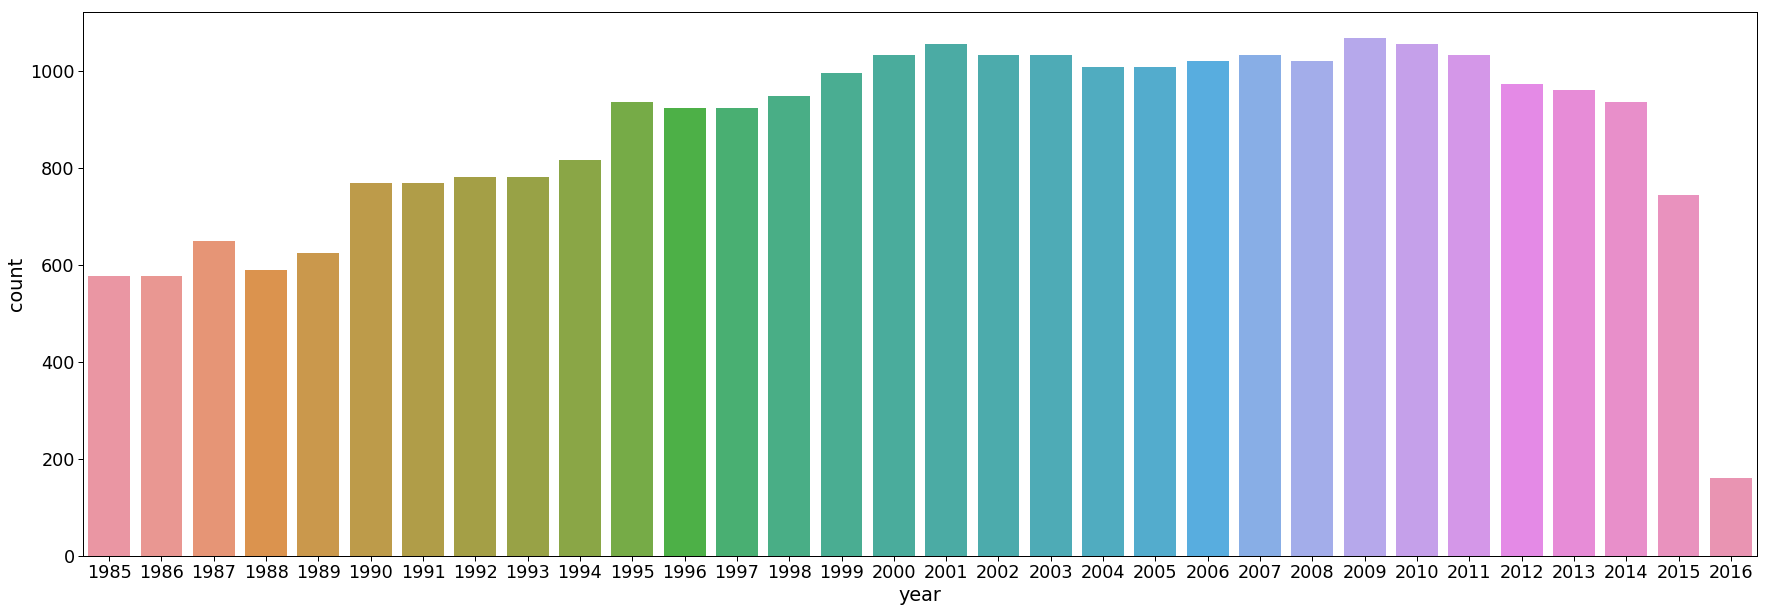

In [199]:
#data distribution yearwise


plt.figure(figsize=(30,10))
y = df['year']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='count')

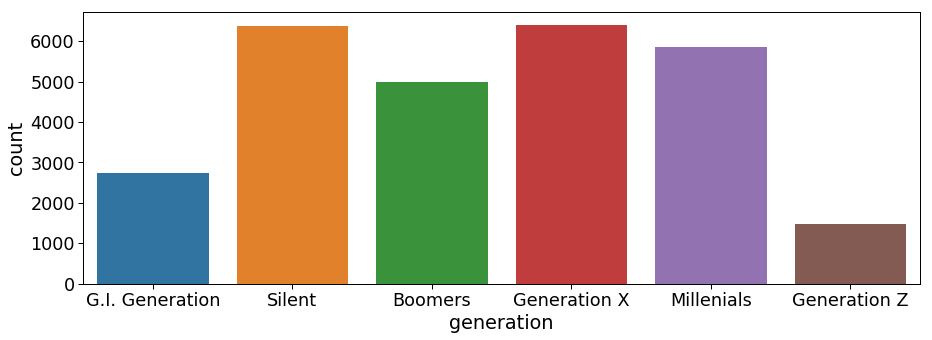

In [200]:
#generationwise distribution in data

plt.figure(figsize=(15,5))
y = df['generation']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='generation',order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


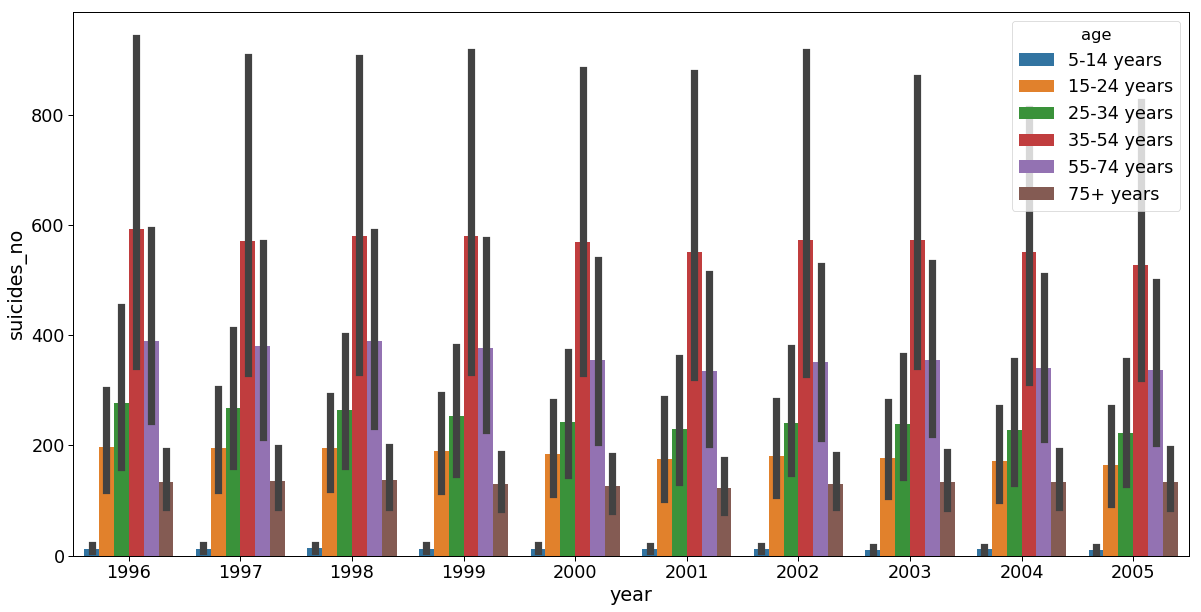

In [201]:
#Yearwise sucides and agewise

plt.figure(figsize=(20,10))
sns.barplot(data=df[(df['year'] >1995) & (df['year']<2006)],x='year',y='suicides_no',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

In [ ]:
df.head()

In [202]:
df_suicide = df[df['year'].isin(range(2001, 2016))]
#To group 'suicides_no' according to each year to get the total no. of suicides for each year
df_year = pd.DataFrame(df_suicide['suicides_no'].groupby(df_suicide['year']).sum()).reset_index()
df_year.head()

,year,suicides_no
0,2001,250652
1,2002,256095
2,2003,256079
3,2004,240861
4,2005,234375


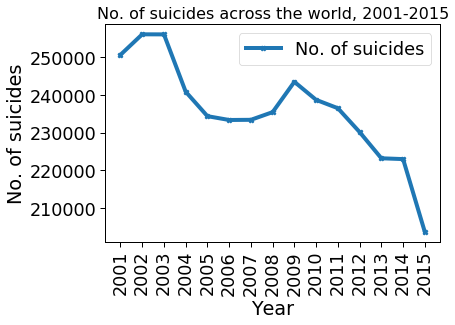

In [203]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_year.plot(kind = 'line',x='year',y='suicides_no', ax=ax, marker = 'X')
ax.set_title('No. of suicides across the world, 2001-2015', fontsize=16)
ax.set_ylabel('No. of suicides')
ax.set_xlabel('Year')
ax.set_xticks(df_year['year'])
ax.set_xticklabels(df_year['year'], rotation=90) 
ax.legend(['No. of suicides'])

plt.show()

In [204]:
#Suicide rate in each country from 2001 - 2015

#To group 'suicides/100k pop' according to each individual country to get the average suicide rate for each country
df_country = pd.DataFrame(df_suicide['suicides/100k pop'].groupby(df_suicide['country']).mean()).reset_index()
df_country.head()

,country,suicides/100k pop
0,Albania,3.464000
1,Antigua and Barbuda,0.685449
2,Argentina,10.135222
3,Armenia,3.093269
4,Aruba,6.569773


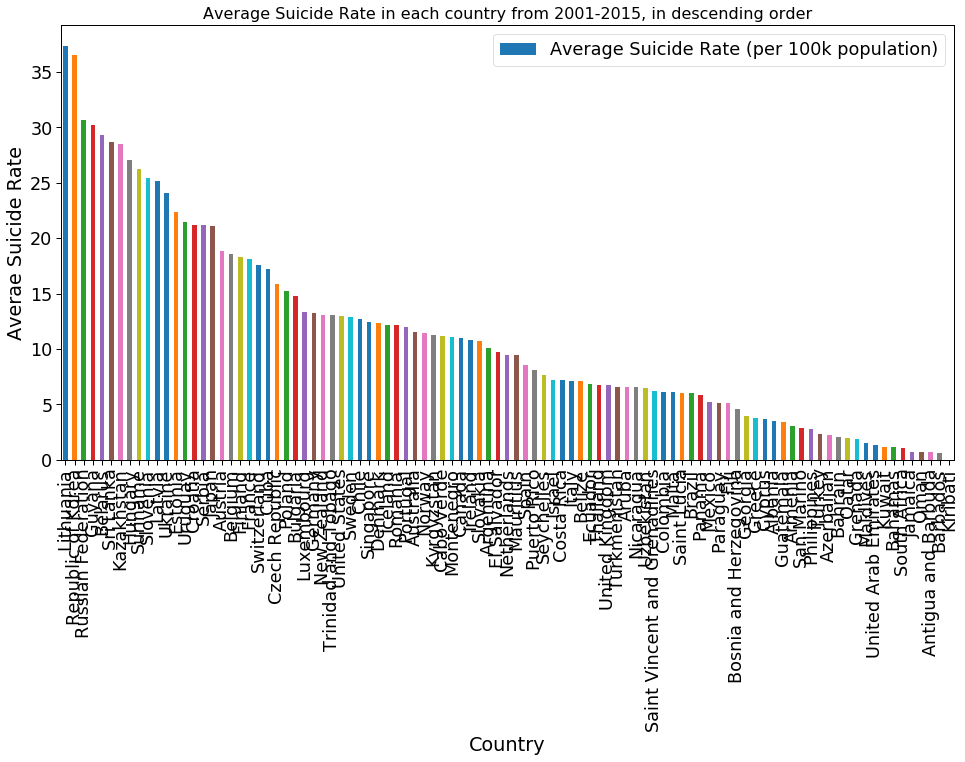

In [205]:
df_country.sort_values('suicides/100k pop',ascending=False,inplace=True)
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,1,1)
df_country.plot(kind = 'bar',x='country',y='suicides/100k pop', ax=ax1)
ax1.set_title('Average Suicide Rate in each country from 2001-2015, in descending order', fontsize=16)
ax1.set_ylabel('Averae Suicide Rate')
ax1.set_xlabel('Country')
ax1.set_xticklabels(df_country['country'], rotation=90)
ax1.legend(['Average Suicide Rate (per 100k population)'])

plt.show()

In [ ]:
#Create a new df for the top 5 countries
df_top5country = df_country[:5]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
df_top5country.plot(kind = 'bar',x='country',y='suicides/100k_pop', ax=ax1)
ax1.set_title('Top 5 countries with highest avg suicide rate', fontsize=10)
ax1.set_ylabel('Average Suicide Rate')
ax1.set_xlabel('Country')
ax1.set_xticklabels(df_top5country['country'], rotation=90)
ax1.legend(['Average Suicide Rate (per 100k population)'], fontsize = 7)

#Create a new df for the bottom 5 countries
df_bottom5country = df_country[-5:]
ax2 = fig.add_subplot(1,2,2)
df_bottom5country.plot(kind = 'bar',x='country',y='suicides/100k_pop', ax=ax2)
ax2.set_title('Bottom 5 countries with lowest avg suicide rate', fontsize=10)
ax2.set_ylabel('Average Suicide Rate')
ax2.set_xlabel('Country')
ax2.set_xticklabels(df_bottom5country['country'], rotation=90)
ax2.legend(['Average Suicide Rate (per 100k population)'], fontsize = 7)

plt.show()

In [206]:
#Suicide rate for top 5 and bottom 5 countries over the years
#Firtly, create a new df for each of the 10 countries
#Secondly,  group 'suicides/100k pop' according to each year to get the average suicide rate for each year

#Top 5 Countries
df_lithuaniayear = df_suicide[df_suicide['country']=='Lithuania']
df_lithuaniayear = pd.DataFrame(df_lithuaniayear['suicides/100k pop'].groupby(df_lithuaniayear['year']).mean()).reset_index()

df_koreayear = df_suicide[df_suicide['country']=='Republic of Korea']
df_koreayear = pd.DataFrame(df_koreayear['suicides/100k pop'].groupby(df_koreayear['year']).mean()).reset_index()

df_russiayear = df_suicide[df_suicide['country']=='Russian Federation']
df_russiayear = pd.DataFrame(df_russiayear['suicides/100k pop'].groupby(df_russiayear['year']).mean()).reset_index()

df_guyanayear = df_suicide[df_suicide['country']=='Guyana']
df_guyanayear = pd.DataFrame(df_guyanayear['suicides/100k pop'].groupby(df_guyanayear['year']).mean()).reset_index()

df_belarusyear = df_suicide[df_suicide['country']=='Belarus']
df_belarusyear = pd.DataFrame(df_belarusyear['suicides/100k pop'].groupby(df_belarusyear['year']).mean()).reset_index()

#Bottom 5 Countries
df_jamaicayear = df_suicide[df_suicide['country']=='Jamaica']
df_jamaicayear = pd.DataFrame(df_jamaicayear['suicides/100k pop'].groupby(df_jamaicayear['year']).mean()).reset_index()

df_omanyear = df_suicide[df_suicide['country']=='Oman']
df_omanyear = pd.DataFrame(df_omanyear['suicides/100k pop'].groupby(df_omanyear['year']).mean()).reset_index()

df_anbyear = df_suicide[df_suicide['country']=='Antigua and Barbuda']
df_anbyear = pd.DataFrame(df_anbyear['suicides/100k pop'].groupby(df_anbyear['year']).mean()).reset_index()

df_baryear = df_suicide[df_suicide['country']=='Barbados']
df_baryear = pd.DataFrame(df_baryear['suicides/100k pop'].groupby(df_baryear['year']).mean()).reset_index()

df_kiribatiyear = df_suicide[df_suicide['country']=='Kiribati']
df_kiribatiyear = pd.DataFrame(df_kiribatiyear['suicides/100k pop'].groupby(df_kiribatiyear['year']).mean()).reset_index()

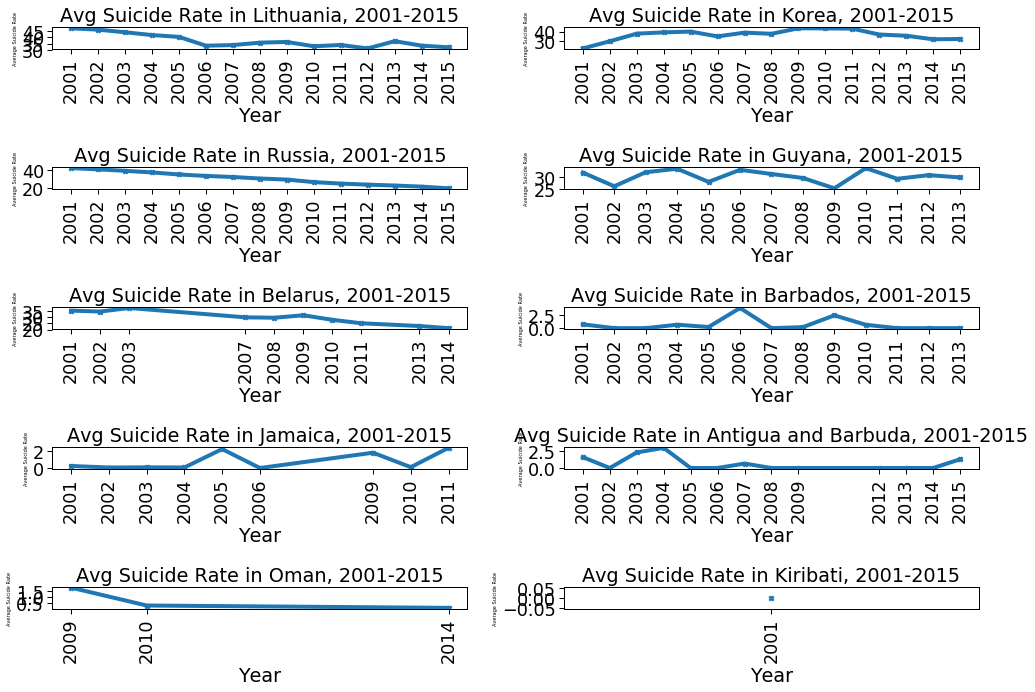

In [207]:
#Top 5 Countries
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(5,2,1)
df_lithuaniayear.plot(kind = 'line',x='year',y='suicides/100k pop', ax=ax1, marker = 'X')
ax1.set_title('Avg Suicide Rate in Lithuania, 2001-2015')
ax1.set_ylabel('Average Suicide Rate', fontsize=5)
ax1.set_xlabel('Year')
ax1.set_xticks(df_lithuaniayear['year'])
ax1.set_xticklabels(df_lithuaniayear['year'], rotation=90) 
ax1.get_legend().remove()

ax2 = fig.add_subplot(5,2,2)
df_koreayear.plot(kind = 'line',x='year',y='suicides/100k pop', ax=ax2, marker = 'X')
ax2.set_title('Avg Suicide Rate in Korea, 2001-2015')
ax2.set_ylabel('Average Suicide Rate', fontsize=5)
ax2.set_xlabel('Year')
ax2.set_xticks(df_koreayear['year'])
ax2.set_xticklabels(df_koreayear['year'], rotation=90) 
ax2.get_legend().remove()

ax3 = fig.add_subplot(5,2,3)
df_russiayear.plot(kind = 'line',x='year',y='suicides/100k pop', ax=ax3, marker = 'X')
ax3.set_title('Avg Suicide Rate in Russia, 2001-2015')
ax3.set_ylabel('Average Suicide Rate', fontsize=5)
ax3.set_xlabel('Year')
ax3.set_xticks(df_russiayear['year'])
ax3.set_xticklabels(df_russiayear['year'], rotation=90) 
ax3.get_legend().remove()

ax4 = fig.add_subplot(5,2,4)
df_guyanayear.plot(kind = 'line',x='year',y='suicides/100k pop', ax=ax4, marker = 'X')
ax4.set_title('Avg Suicide Rate in Guyana, 2001-2015')
ax4.set_ylabel('Average Suicide Rate', fontsize=5)
ax4.set_xlabel('Year')
ax4.set_xticks(df_guyanayear['year'])
ax4.set_xticklabels(df_guyanayear['year'], rotation=90) 
ax4.get_legend().remove()

ax5 = fig.add_subplot(5,2,5)
df_belarusyear.plot(kind = 'line',x='year',y='suicides/100k pop', ax=ax5, marker = 'X')
ax5.set_title('Avg Suicide Rate in Belarus, 2001-2015')
ax5.set_ylabel('Average Suicide Rate', fontsize=5)
ax5.set_xlabel('Year')
ax5.set_xticks(df_belarusyear['year'])
ax5.set_xticklabels(df_belarusyear['year'], rotation=90)
ax5.get_legend().remove()

#Bottom 5 Countries
ax6 = fig.add_subplot(5,2,7)
df_jamaicayear.plot(kind = 'line',x='year',y='suicides/100k pop', ax=ax6, marker = 'X')
ax6.set_title('Avg Suicide Rate in Jamaica, 2001-2015')
ax6.set_ylabel('Average Suicide Rate', fontsize=5)
ax6.set_xlabel('Year')
ax6.set_xticks(df_jamaicayear['year'])
ax6.set_xticklabels(df_jamaicayear['year'], rotation=90)
ax6.get_legend().remove()

ax7 = fig.add_subplot(5,2,9)
df_omanyear.plot(kind = 'line',x='year',y='suicides/100k pop', ax=ax7, marker = 'X')
ax7.set_title('Avg Suicide Rate in Oman, 2001-2015')
ax7.set_ylabel('Average Suicide Rate', fontsize=5)
ax7.set_xlabel('Year')
ax7.set_xticks(df_omanyear['year'])
ax7.set_xticklabels(df_omanyear['year'], rotation=90)
ax7.get_legend().remove()

ax8 = fig.add_subplot(5,2,8)
df_anbyear.plot(kind = 'line',x='year',y='suicides/100k pop', ax=ax8, marker = 'X')
ax8.set_title('Avg Suicide Rate in Antigua and Barbuda, 2001-2015')
ax8.set_ylabel('Average Suicide Rate', fontsize=5)
ax8.set_xlabel('Year')
ax8.set_xticks(df_anbyear['year'])
ax8.set_xticklabels(df_anbyear['year'], rotation=90)
ax8.get_legend().remove()

ax9 = fig.add_subplot(5,2,6)
df_baryear.plot(kind = 'line',x='year',y='suicides/100k pop', ax=ax9, marker = 'X')
ax9.set_title('Avg Suicide Rate in Barbados, 2001-2015')
ax9.set_ylabel('Average Suicide Rate', fontsize=5)
ax9.set_xlabel('Year')
ax9.set_xticks(df_baryear['year'])
ax9.set_xticklabels(df_baryear['year'], rotation=90)
ax9.get_legend().remove()

ax10 = fig.add_subplot(5,2,10)
df_kiribatiyear.plot(kind = 'line',x='year',y='suicides/100k pop', ax=ax10, marker = 'X')
ax10.set_title('Avg Suicide Rate in Kiribati, 2001-2015')
ax10.set_ylabel('Average Suicide Rate', fontsize=5)
ax10.set_xlabel('Year')
ax10.set_xticks(df_kiribatiyear['year'])
ax10.set_xticklabels(df_kiribatiyear['year'], rotation=90)
ax10.get_legend().remove()

plt.tight_layout() #so that the labels does not overlap each other
plt.show()


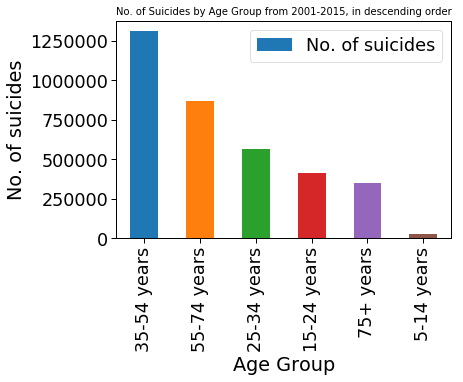

In [208]:
#To group 'suicides_no' according to each age group to get the total no. of suicides for each age group
df_age = pd.DataFrame(df_suicide['suicides_no'].groupby(df_suicide['age']).sum()).reset_index()
df_age.sort_values('suicides_no',ascending=False,inplace=True)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
df_age.plot(kind = 'bar',x='age',y='suicides_no', ax=ax1)
ax1.set_title('No. of Suicides by Age Group from 2001-2015, in descending order', fontsize=10)
ax1.set_ylabel('No. of suicides')
ax1.set_xlabel('Age Group')
ax1.set_xticklabels(df_age['age'], rotation=90)
ax1.legend(['No. of suicides'])

plt.show()

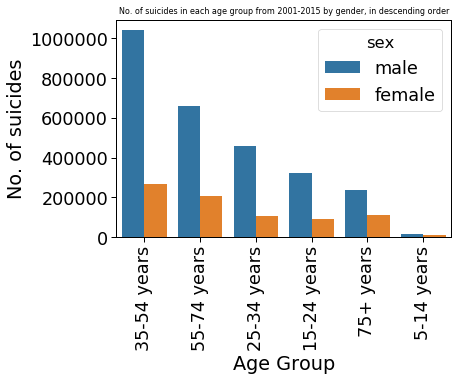

In [209]:
#To group 'suicides_no' according to each age group and gender to get the total no. of suicides for each age group and gender
df_age_gender = df_suicide[['age','suicides_no','sex']].groupby(['age','sex']).sum().reset_index()
df_age_gender.sort_values('suicides_no',ascending=False,inplace=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.barplot(data=df_age_gender, x='age', y='suicides_no', hue='sex')
plt.xticks(rotation=90)
plt.xlabel('Age Group')
plt.ylabel('No. of suicides')
plt.title('No. of suicides in each age group from 2001-2015 by gender, in descending order', fontsize=8)

plt.show()

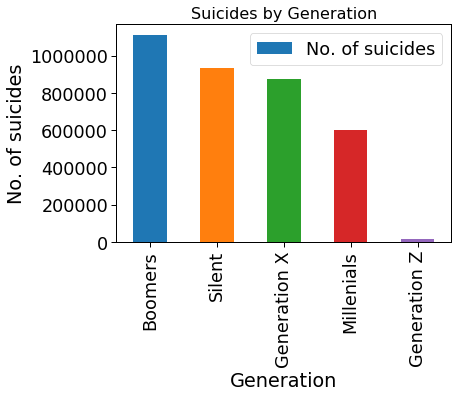

In [210]:
#To group 'suicides_no' according to each generation to get the total no. of suicides for each generation
df_generation = pd.DataFrame(df_suicide['suicides_no'].groupby(df_suicide['generation']).sum()).reset_index()
df_generation.sort_values('suicides_no',ascending=False,inplace=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_generation.plot(kind = 'bar',x='generation',y='suicides_no', ax=ax)
ax.set_title('Suicides by Generation', fontsize=16)
ax.set_ylabel('No. of suicides')
ax.set_xlabel('Generation')
ax.set_xticklabels(df_generation['generation'], rotation=90)
ax.legend(['No. of suicides'])

plt.show()

In [211]:
#Logistic Regression
import statsmodels.api as sm
from statsmodels.api import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# group 'suicides/100k pop' according to the gdp per capita to get the average suicide rate for each country in different year
#,since GDP per capita is already filtered by different countries and different years. 
df_logistic = df_suicide.groupby('gdp_per_capita ($)').agg({'suicides/100k pop':'mean','HDI for year':'first'}).reset_index()
df_logistic.describe()

,gdp_per_capita ($),suicides/100k pop,HDI for year
count,1223.000000,1223.000000,1223.000000
mean,22046.607522,11.938129,0.785360
std,22294.660436,8.987440,0.054004
min,345.000000,0.000000,0.576000
25%,5279.000000,5.339167,0.776601
50%,13501.000000,10.577500,0.776601
75%,33002.500000,16.808333,0.776601
max,126352.000000,46.301667,0.944000


In [ ]:
df_suicide.columns

In [212]:
#using df_logistic.describe(), we can see that the average suicide rate is 11.938129
df_logistic['suicide'] = np.where(df_logistic['suicides/100k pop']>11, 1, 0) 

y = df_logistic.suicide.copy() #copy 'y' column values out
X = df_logistic.drop(['suicide'], axis=1) #then, drop y column
X.drop(['suicides/100k pop'], axis=1, inplace=True) 

In [213]:
X.head()

,gdp_per_capita ($),HDI for year
0,345,0.776601
1,359,0.776601
2,424,0.776601
3,428,0.776601
4,441,0.776601


In [214]:
#splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [215]:
def simple_heuristic(df_suicide):

    predictions = [] 
    
    for victim_index, victim in df_suicide.iterrows():   
        if victim['HDI for year'] > 0.55 and victim['gdp_per_capita ($)'] > 16800:
            predictions.append(1) 
        else:
            predictions.append(0) 

    return predictions


simplePredictions = simple_heuristic(X_test)
correct = sum(simplePredictions == y_test)
print ("Baseline: ", correct/len(y_test))

Baseline:  0.5469387755102041


In [216]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [217]:
df_suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [218]:
model.score(X_train, y_train)

0.5715746421267893

In [219]:
model.score(X_test, y_test)

0.5306122448979592

In [220]:
model.intercept_

array([-0.02241296])

In [221]:
model.coef_ 

array([[ 5.77228193e-06, -1.51870055e-02]])